# Método de Richardson (Extrapolación de Richardson):

El método de Richardson es una técnica de extrapolación utilizada para mejorar la precisión
de una aproximación numérica. Se basa en la idea de combinar dos o más aproximaciones
con diferentes tamaños de paso para obtener una estimación más precisa.

Principios básicos:
1. Se realizan cálculos con diferentes tamaños de paso (h y h/2, por ejemplo).
2. Se asume que el error de la aproximación es una función polinómica del tamaño del paso.
3. Se combinan las aproximaciones para cancelar los términos de error de orden inferior.

La fórmula general de la extrapolación de Richardson es:

$$ R = \frac{2^n A(\frac{h}{2}) - A(h)}{2^n - 1} $$

Donde:
- R es el resultado mejorado
- A(h) es la aproximación con paso h
- A(h/2) es la aproximación con paso h/2
- n es el orden del error principal

[Fuente Wikipedia](https://es.wikipedia.org/wiki/Extrapolaci%C3%B3n_de_Richardson)

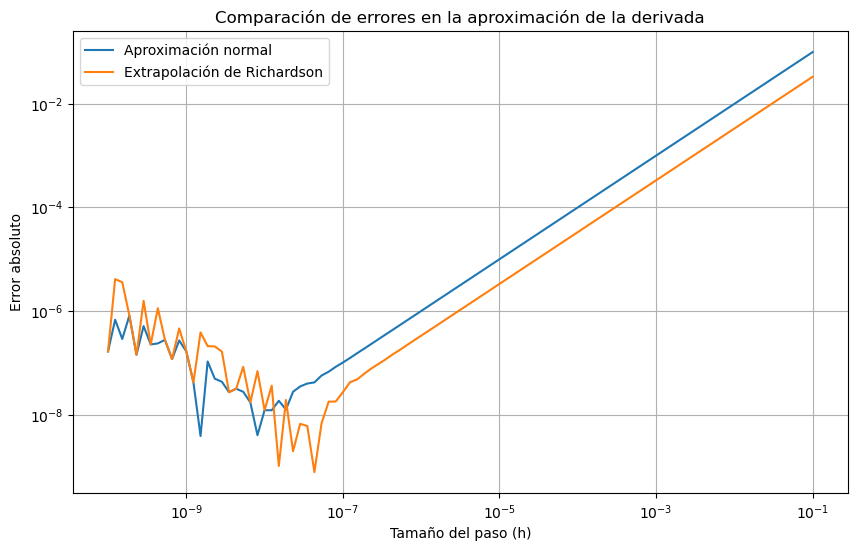

Derivada real en x=1.0: 2.0
Mejor aproximación normal: 2.0000000038500354
Mejor aproximación con Richardson: 2.000000000773381
Menor error normal: 3.8500354015980065e-09
Menor error con Richardson: 7.733809148646742e-10


In [1]:
"""
ejemplo de aplicación del método de Richardson
para mejorar la aproximación de la derivada de una función.
"""

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Función de ejemplo: f(x) = x^2"""
    return x**2

def derivative_approx(x, h):
    """Aproximación de la derivada usando diferencias finitas"""
    return (f(x + h) - f(x)) / h

def richardson_extrapolation(x, h):
    """Aplicar extrapolación de Richardson para mejorar la aproximación de la derivada"""
    d1 = derivative_approx(x, h)
    d2 = derivative_approx(x, h/2)
    return (4*d2 - d1) / 3  # Fórmula para orden de convergencia 2

# Parámetros
x = 1.0  # Punto en el que calculamos la derivada
h_values = np.logspace(-1, -10, 100)  # Valores de h desde 10^-1 hasta 10^-10

# Calcular aproximaciones
normal_approx = [derivative_approx(x, h) for h in h_values]
richardson_approx = [richardson_extrapolation(x, h) for h in h_values]

# Valor real de la derivada en x=1
true_derivative = 2.0

# Calcular errores
normal_errors = np.abs(np.array(normal_approx) - true_derivative)
richardson_errors = np.abs(np.array(richardson_approx) - true_derivative)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.loglog(h_values, normal_errors, label='Aproximación normal')
plt.loglog(h_values, richardson_errors, label='Extrapolación de Richardson')
plt.xlabel('Tamaño del paso (h)')
plt.ylabel('Error absoluto')
plt.title('Comparación de errores en la aproximación de la derivada')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir algunos resultados
print(f"Derivada real en x={x}: {true_derivative}")
print(f"Mejor aproximación normal: {normal_approx[np.argmin(normal_errors)]}")
print(f"Mejor aproximación con Richardson: {richardson_approx[np.argmin(richardson_errors)]}")
print(f"Menor error normal: {np.min(normal_errors)}")
print(f"Menor error con Richardson: {np.min(richardson_errors)}")